# 데이터마이닝 2주차 실습

## Linear Regression 2

### 회귀분석
> 단순히 회귀식을 추정하는 것만 의미하지 않음. 추정된 회귀식이 정말로 종속변수와 독립변수간 변량을 잘 설명할 수 있는 지,   
추정된 회귀 계수가 정말로 의미 있는 값인지(0이 아닌지)에 대한 통계적 검정을 해야함

1. 회귀 모델 수립
2. 설명 변수들 간 다중 공선성 분석
3. 회귀식 추정
4. 예측 및 평가
5. 회귀식 적합성에 대한 통계적 검정
6. 회귀계수 유의성에 대한 통계적 검정

### Dataset
>**※ 프랜차이즈 매장 연간 순 매출액 예측 ※**
        
        Dataset: All Greens Franchise
        The data (X1, X2, X3, X4, X5, X6) are for each franchise store.
         X1 = annual net sales / 1000달러 [연간 순 매출액 / 1000달러 : 실질적인 반응변수(y)]
         X2 = number sq. ft./1000 [제곱 피트 수(매장 면적) / 1000]
         X3 = inventory / 1000달러 [재고 / 1,000달러]
         X4 = amount spent on advertizing / 1000달러 [광고 비용 / 1,000달러]
         X5 = size of sales district / 1000families [판매 지역의 규모/ 1000가구]
         X6 = number of competing stores in district [지역 내 경쟁 상점 수]
        data_type: Numeric
        http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html
        

In [1]:
import numpy as np
import pandas as pd
# 시각화 package
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
Sales_data = pd.read_csv('franchies.csv')
Sales_data.columns = ['sales','sqft','inventory','advertizing','district','competing'] 
Sales_data

,sales,sqft,inventory,advertizing,district,competing
0,231.0,3.0,294,8.2,8.200000,11
1,156.0,2.2,232,6.9,4.100000,12
2,10.0,0.5,149,3.0,4.300000,15
3,519.0,5.5,600,12.0,16.100000,1
4,437.0,4.4,567,10.6,14.100000,5
5,487.0,4.8,571,11.8,12.700000,4
6,299.0,3.1,512,8.1,10.100000,10
7,195.0,2.5,347,7.7,8.400000,12
8,20.0,1.2,212,3.3,2.100000,15
9,68.0,0.6,102,4.9,4.700000,8


## 1. Regression model
+ X : `sqft`,`inventory`,`advertizing`,`district`,`competing`
+ y : `sales`

In [3]:
X = Sales_data[['sqft','inventory','advertizing','district','competing']].copy()
y = Sales_data['sales'].copy()
print(X.shape, y.shape)

(27, 5) (27,)


## 2. 다중공선성(Multicollinearity)
독립변수끼리 높은 상관관계를 가지면 다중공선성이 발생
> 1. F검정은 통과했으나 각각의 회귀계수가 t검정을 통과하지 못하는 경우
> 2. 예상하던 것과 달리 회귀계수의 부호가 반대일 정도로 괴리가 큰 경우
> 3. 데이터를 추가하거나 제거할 때 기존의 회귀계수가 극심하게 많이 변하는 경우

+ 다중공선성 확인방법 : 산점도/상관관계 또는 VIF
+ 해결방법 : 정규화, 변수제거, PCA 

### 2.1 Correlation
Interpretation of the Pearson correlation coefficients (Rules of Thumbs)

|Size of Correlaiton | Interpretation |
|:---------:|------:|
|.8 to 1.0 | Very strong | 
|.6 to .8 | Strong |
|.4 to .6 | Moderate |
|.2 to .4 | Weak |
|.0 to .2 | Very weak |

보통 상관계수가 0.9 정도 이상이면 다중공선성이 존재

<AxesSubplot:>

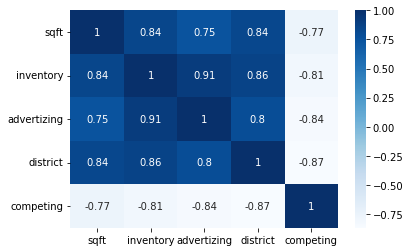

In [4]:
sns.heatmap(X.corr(), cmap="Blues", annot = True)

### 2.2 분산팽창요인(VIF)
$VIF_k = \frac1{1-R_k^2},\,\,\,\,$
($R_k^2 = X_k$를 종속변수로 두고 나머지 독립변수로 회귀분석을 했을 때 결정계수 )
+ 다중공선성의 정도를 의미, 보통 VIF 값이 10 이상이면 다중공선성 존재  
https://en.wikipedia.org/wiki/Variance_inflation_factor

In [5]:
# !pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
# detecting multicollinearity with VIF
# calculating VIF for each feature
X1=X.copy()
X1['intercept'] = 1 # w/ intercept
vif = pd.DataFrame()
vif["feature"] = X1.columns
vif["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(len(X1.columns))]
vif.round(1)

,feature,VIF
0,sqft,4.2
1,inventory,10.1
2,advertizing,7.6
3,district,6.9
4,competing,5.8
5,intercept,78.8


inventory를 제외한 나머지 변수들은 다중공선성을 띄지 않는 것으로 보임

## 3.Regression equation

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# 모델 객체 생성,
m_reg = LinearRegression(fit_intercept = True) # fit_intercept -> beta0 생성 여부
m_reg.fit(X, y) # 모델 학습

LinearRegression()

In [9]:
m_reg.intercept_ # 절편 b0

-18.859414160020606

In [10]:
m_reg.coef_ # 회귀계수 b1,b2,...

array([16.20157356,  0.17463515, 11.52626903, 13.5803129 , -5.31097141])

In [11]:
# 회귀식
intercept = np.round(m_reg.intercept_,3)
coef = np.round(m_reg.coef_,3)
print('y={} + {}x1 + {}x2 + {}x3 + {}x4 + {}x5'.format(intercept,
                                                       coef[0],coef[1],coef[2],coef[3],coef[4]))

y=-18.859 + 16.202x1 + 0.175x2 + 11.526x3 + 13.58x4 + -5.311x5


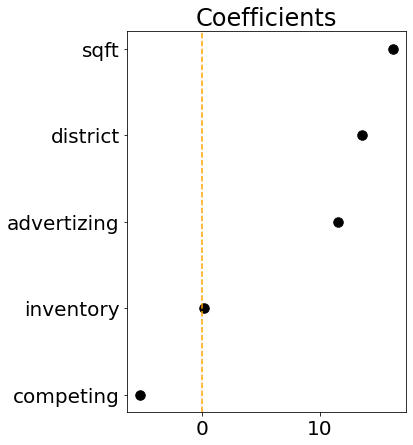

In [12]:
# coef-plot
coef_df = pd.DataFrame(coef, index = X.columns, columns = ['coef'])
coef_df = coef_df.sort_values(by=['coef'])

plt.rc('font', size=20)
fig, ax = plt.subplots(figsize=(5, 7))
ax.scatter(x=coef_df, y=coef_df.index, marker='o', s=90, color='k')
ax.axvline(x=0, linestyle='--', color='Orange')
plt.title('Coefficients')
plt.show()

## 4. 예측 및 성능 확인

In [13]:
# predict
pred_y = m_reg.predict(X)
print(np.round(list(pred_y),3))

[228.541 128.778  28.572 526.678 438.552 445.861 298.193 221.338  24.496
  86.493 568.526 423.925 468.736   7.74   70.489  70.011 369.968 156.996
 393.279 506.07  538.328  88.842  17.489 352.217 347.133 518.329 411.92 ]


### 4.1 R-squared와 Adjusted_R-squard의 차이점
$Adj\,\,R^2 = 1 - (1-R^2)\frac{n-1}{n-p-1}$,  
where $p=$ number of predictors, n=total sample size.
> + 독립 변수를 모델에 추가할 때마다 독립 변수가 미미하더라도 R-squared는 증가함. 결코 줄어들지 않음.   
반면, Adjusted R-Squared는 독립 변수가 유의하고 종속 변수에 영향을 미칠 때만 증가
> + Adjusted_R-squared는 R-squared가 0에 가까울 때 음수가 될 수 있다.
> + Adjusted_R-squared 값은 항상 R-squared 값보다 작거나 같다.

In [14]:
# R-squared
r2 = round(m_reg.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.993


In [15]:
# Adjusted R-Squared
n,p = X.shape
adj_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
print("Adjusted R-Squared :", round(adj_r2,3))

Adjusted R-Squared : 0.991


In [16]:
# MSE : 관측값과의 차이가 얼마나 있는지 말해주는 수치
from sklearn.metrics import mean_squared_error
mean_squared_error(y, pred_y, squared=False)

15.565168074037189

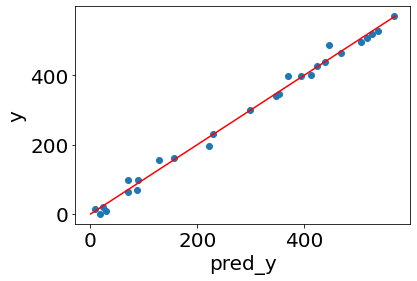

In [17]:
# 실제 y값과 예측한 y햇의 관계
plt.scatter(pred_y, y)
line = np.linspace(min(y.values), max(y.values), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('pred_y')
plt.ylabel('y')
plt.show()

## 5. 회귀식의 적합성

#### f-test, F-value
+ F-value : 가설 $\mathbf{\beta_1,\beta_2},...=0$(선형관계인 것이 없다)에 대한 검정통계량
+ $F = \frac{SS(mean) - SS(fit)\,/\,(p_{fit} - p_{mean})}{SS(fit)\,/\,(n-p_{fit})}$
+ $F$ : 회귀식으로 설명되는 변동 / 설명되지 않는 변동 (선형관계)
+ $R^2$ : 회귀식으로 설명되는 변동/ 평균으로부터의 변동 (설명력)
+ Degree of freedom (자유도)
    + 참고 : https://brunch.co.kr/@zhoyp/174

In [18]:
# n : total sample size, p : number of predictors
n,p = X.shape
n,p

(27, 5)

In [19]:
# F-value
y_bar = np.mean(y.values)
SS_mean = sum((y - y_bar)**2)
SS_fit = sum((y - pred_y)**2)

F = ((SS_mean - SS_fit) / ((p+1)-1)) / (SS_fit / (n-(p+1)))
print(F)

611.5903672370399


In [20]:
from scipy import stats # scipy.stats 확률분포 분석을 위한 기능을 제공
pvalue = 1-stats.f.cdf(611,p-1,n-p-1) # cdf : 누적분포함수
pvalue
#print(format(pvalue,'.20f'))

1.1102230246251565e-16

## 6. 회귀계수의 유의성
+ t-test, $H_0 : \beta_i = 0, H_1 : \beta_i \neq 0$

In [21]:
import statsmodels.api as sm

In [22]:
X2 = sm.add_constant(X)
reg = sm.OLS(y, X2)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     611.6
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           5.40e-22
Time:                        16:58:23   Log-Likelihood:                -112.43
No. Observations:                  27   AIC:                             236.9
Df Residuals:                      21   BIC:                             244.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -18.8594     30.150     -0.626      0.538     -81.560      43.841
sqft           16.2016      3.544      4.571      0.000       8.831      23.573
inventory       0.1746      0.058      3.032      0.006       0.055       0.294
advertizing    11.5263      2.532      4.552      0.000       6.260      16.792
district       13.5803      1.770      7.671      0.000       9.898      17.262
competing      -5.3110      1.705     -3.114      0.005      -8.858      -1.764
==============================================================================
Omnibus:                        5.650   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.041
Skew:                           0.916   Prob(JB):                        0.133
Kurtosis:                       3.484   Cond. No.                     3.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""